In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('cleaned_vgchartz.csv')
df.head()

,img,title,console,genre,publisher,developer,rating,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
1,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
2,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
3,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
4,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


In [2]:
df.describe()

,rating,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,7.659929,1.874149,0.757589,0.106596,0.765532,0.244149
std,1.203786,2.895821,1.250511,0.157181,1.381634,0.432566
min,3.000000,0.020000,0.010000,0.000000,0.000000,0.000000
25%,7.000000,0.370000,0.140000,0.020000,0.090000,0.030000
50%,7.900000,0.710000,0.265000,0.050000,0.270000,0.060000
75%,8.500000,1.882500,0.717500,0.137500,0.612500,0.247500
max,9.800000,19.390000,8.270000,1.430000,9.710000,3.020000


In [3]:
print(df['console'].nunique(), 'unique consoles')
print(df['genre'].nunique(), 'unique genre')
print(df['publisher'].nunique(), 'unique publisher')

14 unique consoles
18 unique genre
43 unique publisher


In [4]:
df['total_sales'] = pd.to_numeric(df['total_sales'], errors='coerce')
most_pop_game = df.loc[df['total_sales'].idxmax()]
print('The Most Popular Game is ' f'{most_pop_game['title']}')
print('The Total Sales is ' f'${most_pop_game['total_sales']} millon')

The Most Popular Game is Grand Theft Auto V
The Total Sales is $19.39 millon


In [5]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
most_rated_game = df.loc[df['rating'].idxmax()]
print('The Highly Rated Game is ' f'{most_rated_game['title']}')
print('The Total Rate is ' f'{most_pop_game['rating']} out of 10')

The Highly Rated Game is Red Dead Redemption 2
The Total Rate is 9.7 out of 10


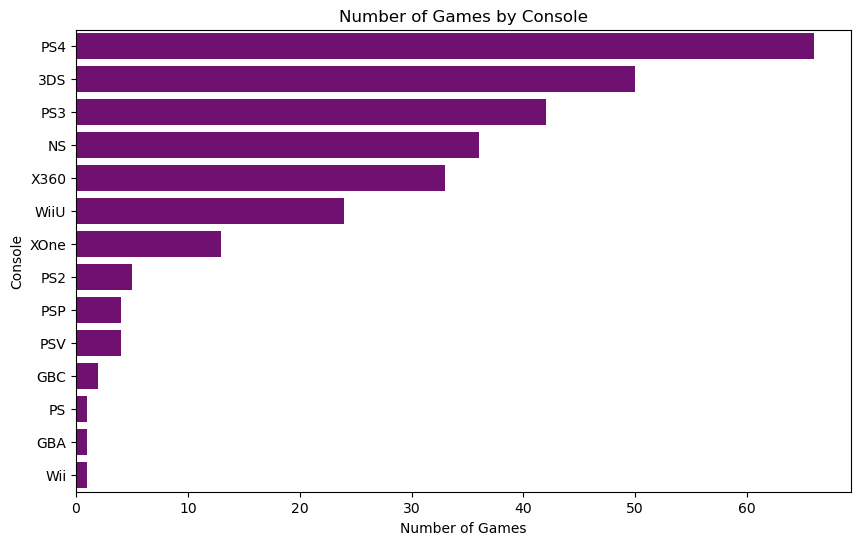

In [6]:
# Count of games by console
plt.figure(figsize=(10, 6))
sns.countplot(y='console', data=df, color='purple', order=df['console'].value_counts().index)
plt.title('Number of Games by Console')
plt.xlabel('Number of Games')
plt.ylabel('Console')
plt.show()

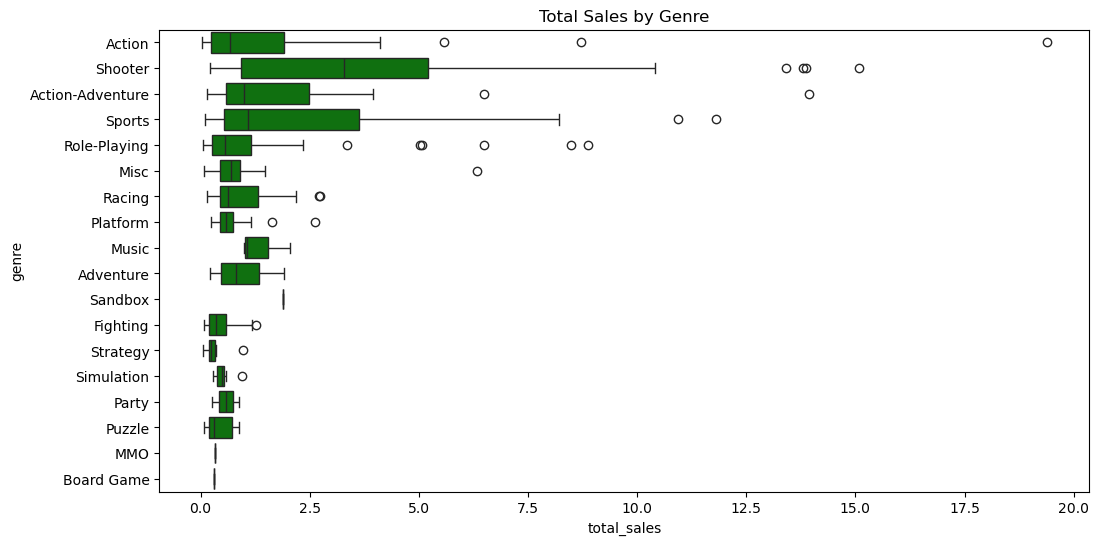

In [7]:
# Use boxplot to compare total sales across genres
plt.figure(figsize=(12,6))
sns.boxplot(x='total_sales', y='genre', data=df, color='green')
plt.title('Total Sales by Genre')
plt.show()

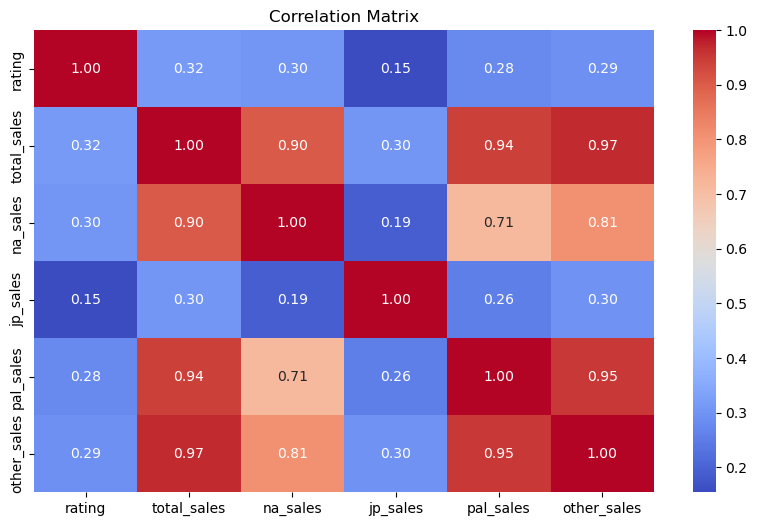

In [8]:
df = df.drop(['img', 'title', 'console', 'genre' ,'publisher', 'developer', 'release_date',	'last_update'], axis=1)

plt.figure(figsize=(10, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can conclude that the most popular game is not the highest rated game, the most used console is the PS4, and most sales are from the Shooter genre.